## MileStone 1

Objective: Data Preprocessing.

Data preprocessing is a technique which is done to improvise the data's quality. By removing nulls,duplicate, constants and quasi constants, we basically make the model fit for the further procedures.

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 250)

#Imported all the necessity packages. 

In [3]:
data = pd.read_csv('H2HBABBA1650.csv') #reading the csv file



In [4]:
#splitting

In [5]:
test = data[data['clear_date'].isnull()].to_csv('testdata.csv', index=False) #shifted to test data

In [6]:
train = data[~data['clear_date'].isnull()].to_csv('traindata.csv', index= False) # shifted to train data

In [7]:
#read train csv

data = pd.read_csv('traindata.csv')
df=pd.DataFrame(data)
df.shape

(40000, 19)

In [8]:
#Checking the null cols. This is done to infer the null cols and remove it 
df.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    5
isOpen                        0
dtype: int64

In [9]:
#drop area business since it is null as observed above
df.drop(['area_business'], axis=1, inplace=True) 

In [10]:
#Removal of constant cols and quasi const cols
#This is because training the model with const data will not allow us to estimate right value 
#

df.drop('business_code', axis=1, inplace=True)
df.drop('name_customer', axis=1, inplace=True)
df.drop('cust_payment_terms', axis=1, inplace=True)
df.drop('invoice_currency', axis=1, inplace=True)
df.drop('document type', axis=1, inplace=True)
df.drop('cust_number', axis=1, inplace=True) #dropped the ones not needed

In [11]:
df['posting_date'] = pd.to_datetime(df['posting_date']).astype(np.int64)
df['clear_date'] = pd.to_datetime(df['clear_date']).astype(np.int64) #converting them to int

In [12]:
df.dtypes # checking the conversion

clear_date                  int64
buisness_year             float64
doc_id                    float64
posting_date                int64
document_create_date        int64
document_create_date.1      int64
due_in_date               float64
posting_id                float64
total_open_amount         float64
baseline_create_date      float64
invoice_id                float64
isOpen                      int64
dtype: object

In [13]:
[col for col in df.columns if df[col].isnull().sum() > 0] #dropped 

['invoice_id']

In [14]:
sel = VarianceThreshold(threshold=0)
sel.fit(df) #set threshold at 0

VarianceThreshold(threshold=0)

In [15]:
sum(sel.get_support()) #2 colmns have const

10

In [16]:
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

[x for x in df.columns if x not in df.columns[sel.get_support()]] #viewing the const cols

2


['posting_id', 'isOpen']

In [17]:
# same process for quasi after dropping posting and isOpen
df.drop(['posting_id'], axis=1, inplace=True) 
df.drop(['isOpen'], axis=1, inplace=True) 

In [18]:
sel = VarianceThreshold(threshold=0.01) #checking quasi const by passing threshold=0.01%
sel.fit(df) #set threshold at 0   

VarianceThreshold(threshold=0.01)

In [19]:
sum(sel.get_support()) #2 colmns have const

10

In [20]:
print(
    len([
        x for x in df.columns
        if x not in df.columns[sel.get_support()]
    ]))

[x for x in df.columns if x not in df.columns[sel.get_support()]] #there are now 0 quasi cols

0


[]

In [21]:
data = pd.read_csv('traindata.csv')
df=pd.DataFrame(data)
df.shape #loaded train data

(40000, 19)

In [22]:
#business area is null and invoice id and isopen is const. So remove it 
df.drop(['area_business'], axis=1, inplace=True) 
df.drop(['posting_id'], axis=1, inplace=True) 
df.drop(['isOpen'], axis=1, inplace=True) 

In [23]:
#Let's check duplicate data 
dup_df=df.T #By transposing it, we get the r
dup_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,...,39875,39876,39877,39878,39879,39880,39881,39882,39883,39884,39885,39886,39887,39888,39889,39890,39891,39892,39893,39894,39895,39896,39897,39898,39899,39900,39901,39902,39903,39904,39905,39906,39907,39908,39909,39910,39911,39912,39913,39914,39915,39916,39917,39918,39919,39920,39921,39922,39923,39924,39925,39926,39927,39928,39929,39930,39931,39932,39933,39934,39935,39936,39937,39938,39939,39940,39941,39942,39943,39944,39945,39946,39947,39948,39949,39950,39951,39952,39953,39954,39955,39956,39957,39958,39959,39960,39961,39962,39963,39964,39965,39966,39967,39968,39969,39970,39971,39972,39973,39974,39975,39976,39977,39978,39979,39980,39981,39982,39983,39984,39985,39986,39987,39988,39989,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
business_code,U001,U001,U001,U001,U001,CA02,U001,U001,U001,CA02,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,CA02,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,...,U001,U001,U001,U001,U001,U001,U013,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U002,U002,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,CA02,U001,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U001,U013,U001
cust_number,0200732755,0200769623,0200799367,0200762301,0200776463,0140106181,0200759878,0200769623,0200772670,0140104409,0200782001,0200780383,0200769623,0100025470,0200769623,0140104225,0200769623,0200726979,0200769623,0200769623,0200769623,0200002965,0200762301,0200014556,0200762301,0200769623,0200778355,0200980828,0200769623,0200769623,0200780383,0100031704,0200315290,0200726979,0200418007,0200707822,0200772670,200748108,0200749782,0200769623,0200750051,0140104508,0140104240,0200705742,0200769623,0200769623,0200769623,0200707822,200769623,0140104340,0200769623,0200759878,200769623,0200714710,0200794332,0200793568,0100021540,0200769623,0200748108,0200744584,0200777735,0200754278,0100026939,0200769623,0140104240,0200769623,0200769623,200769623,0200418007,0200331749,0200769623,200769623,0200736337,0200759878,200769623,0200726979,0200769623,0200759878,0140106408,0200769623,0200762301,0200744019,0200792293,0200779906,0200762301,0200769623,0200416837,0200769623,0200769623,0200769623,200353024,0200708411,0200769623,0200769623,0200786288,0200742791,0200777735,0200707822,0200726979,0200353024,0200468954,0200729942,0200769623,0200148860,0200762950,0200769623,0200756072,0200769623,0200769623,0200020431,0200895843,0200275115,0200747369,0200148860,0140104285,0200704045,0200230690,0200732755,0200769623,0200744019,0200759878,0200742521,0140104440,0200769623,0200769623,...,0200769623,0200799367,200794332,0200772670,0200418007,0200020431,0140103480,0200769623,0200769623,0200936373,0140104340,0100031704,0100031704,0200782001,0200458253,0200769623,0200936373,0200769623,020077

In [24]:
dup_df.duplicated().sum() #to confirm that we have no duplicate values anymore

0

In [25]:
#there are no dups here. so no need to drop


In [26]:
df.nunique()

business_code                 6
cust_number                1390
name_customer              4018
clear_date                  398
buisness_year                 2
doc_id                    39113
posting_date                424
document_create_date        427
document_create_date.1      424
due_in_date                 490
invoice_currency              2
document type                 2
total_open_amount         35623
baseline_create_date        434
cust_payment_terms           69
invoice_id                39108
dtype: int64

In [27]:
df.isnull().sum() #check if there is any null values

business_code             0
cust_number               0
name_customer             0
clear_date                0
buisness_year             0
doc_id                    0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
invoice_currency          0
document type             0
total_open_amount         0
baseline_create_date      0
cust_payment_terms        0
invoice_id                5
dtype: int64

In [28]:
df[df['invoice_id'].isna()] # to check the NaN values 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id
8985,CA02,0140104409,LOB us,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190206,20190216.0,CAD,X2,344.64,20190206.0,CA10,NaN
10764,CA02,0100054349,PURITY L in,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190315,20190325.0,CAD,X2,1123.20,20190315.0,CA10,NaN
24640,CA02,0140104409,LOB associates,2019-05-31 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190131,20190210.0,CAD,X2,20472.48,20190131.0,CA10,NaN
24705,CA02,0140104409,LOB associates,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190319,20190329.0,CAD,X2,179.20,20190319.0,CA10,NaN
32574,CA02,0140106054,TREE llc,2019-05-06 00:00:00,2019.0,9.500000e+09,2019-03-29,20190329,20190208,20190218.0,CAD,X2,938.43,20190208.0,CA10,NaN


In [29]:
df=df.drop(df.index[[8985,10764,24640,24705,32574]]) # dropped the ones which has NAN values in it.


In [30]:
df.shape # to check

(39995, 16)

In [31]:
#pd date time convert and then delay

df['clear_date_pd'] = pd.to_datetime(df['clear_date'])
df['post_date_pd'] = pd.to_datetime(df['posting_date'])

df['due_date_pd'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')

In [32]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,clear_date_pd,post_date_pd,due_date_pd
0,U001,0200732755,KROGER trust,2019-09-05 00:00:00,2019.0,1.929766e+09,2019-08-21,20190820,20190821,20190905.0,USD,RV,55601.86,20190821.0,NAA8,1.929766e+09,2019-09-05,2019-08-21,2019-09-05
1,U001,0200769623,WAL-MAR systems,2020-02-04 00:00:00,2020.0,1.930436e+09,2020-01-25,20200124,20200125,20200209.0,USD,RV,29774.10,20200125.0,NAH4,1.930436e+09,2020-02-04,2020-01-25,2020-02-09
2,U001,0200799367,MCL trust,2019-02-19 00:00:00,2019.0,1.928719e+09,2019-02-01,20190131,20190201,20190216.0,USD,RV,69576.06,20190201.0,NAA8,1.928719e+09,2019-02-19,2019-02-01,2019-02-16
3,U001,0200762301,C&S WH associates,2019-09-05 00:00:00,2019.0,1.929769e+09,2019-08-21,20190821,20190821,20190905.0,USD,RV,22203.59,20190821.0,NAC6,1.929769e+09,2019-09-05,2019-08-21,2019-09-05
4,U001,0200776463,KROGE trust,2019-07-22 00:00:00,2019.0,1.929578e+09,2019-07-05,20190705,20190705,20190720.0,USD,RV,13733.15,20190705.0,NAA8,1.929578e+09,2019-07-22,2019-07-05,2019-07-20


In [33]:
# to get the actual delay date, we have to subtract post_date_pd from clear_date_pd. Similarly, to check the
#exp_delay_days, we have to subtract post_date_pd from due_date_pd

df['act_delay_days'] = df['clear_date_pd'] - df['post_date_pd']
df['exp_delay_days'] = df['due_date_pd'] - df['post_date_pd'] #lets add target col here 



In [34]:
df['exp_delay_days'] = df.exp_delay_days.astype('timedelta64[D]').astype(int)
df['act_delay_days'] = df.act_delay_days.astype('timedelta64[D]').astype(int)

#converted to int 
df.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                        object
buisness_year                    float64
doc_id                           float64
posting_date                      object
document_create_date               int64
document_create_date.1             int64
due_in_date                      float64
invoice_currency                  object
document type                     object
total_open_amount                float64
baseline_create_date             float64
cust_payment_terms                object
invoice_id                       float64
clear_date_pd             datetime64[ns]
post_date_pd              datetime64[ns]
due_date_pd               datetime64[ns]
act_delay_days                     int32
exp_delay_days                     int32
dtype: object

In [35]:
#df['delay'] = np.where(df.delay.lt(0), 0, df.delay) #neg values to 0

In [36]:
# bins = [0,15,30,45,60, 1000]   #6 elements
# category = ["0-15 days", "16-30 days", "31-45 days", "46-60 days", "Greater than 60 days"]  #5 elements
# df['age_bucket'] = pd.cut(df["delay"],bins,labels = category)

# df.head()

In [37]:
#df["age_bucket"].fillna('0-15 days', inplace = True)

In [38]:
#df['age_bucket'] = df.age_bucket.astype(str)

In [39]:
#sorting the posting date in ascending order 
df_sort = df.sort_values(by = 'posting_date', ascending=True) 

In [40]:
df_sort.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,clear_date_pd,post_date_pd,due_date_pd,act_delay_days,exp_delay_days
24429,U001,0200759878,SA foundation,2019-01-15 00:00:00,2019.0,1.928533e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,14380.16,20181230.0,NAH4,1.928533e+09,2019-01-15,2018-12-30,2019-01-14,16,15
31057,U001,0200769623,WAL-MAR systems,2019-01-15 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,67716.67,20181230.0,NAH4,1.928542e+09,2019-01-15,2018-12-30,2019-01-14,16,15
18594,U001,0200772670,ASSOCIAT corp,2019-01-14 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,102714.96,20181230.0,NAU5,1.928543e+09,2019-01-14,2018-12-30,2019-01-14,15,15
20550,U001,0200772670,ASSOCIAT associates,2019-01-14 00:00:00,2019.0,1.928541e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,163687.89,20181230.0,NAU5,1.928541e+09,2019-01-14,2018-12-30,2019-01-14,15,15
35312,CA02,0140105785,SHOPPE associates,2019-01-18 00:00:00,2019.0,2.960520e+09,2018-12-30,20181230,20181230,20190113.0,CAD,RV,46528.10,20190103.0,CA10,2.960520e+09,2019-01-18,2018-12-30,2019-01-13,19,14


In [41]:
#reseting the index
df_sort = df_sort.reset_index(drop = True) 

In [42]:
# to count the values
df_sort['cust_payment_terms'].value_counts() 

NAA8    16032
NAH4    10566
CA10     3098
NAC6     1364
NAM4     1010
NAAX      954
NAD1      788
NAG2      750
NAU5      735
NAGD      631
NA32      596
NAX2      554
NAM2      476
NA10      344
NAD5      300
NAVE      257
NAM1      224
NAVF      207
NAAW      182
NAWU      125
NAVQ       99
NAWN       89
NAVR       80
NAWP       78
NAUZ       50
NACB       38
CA30       37
NAVM       36
NA3B       35
NA38       34
NABG       26
NAB1       21
NAD4       20
NA3F       16
NAVL       15
NAVD       14
C106       12
NA9X       12
NA84       10
BR56        7
NAV9        6
NAWM        6
NA25        6
CAB1        5
NAUP        4
BR12        3
NATH        3
NAD8        3
NATL        3
NATZ        3
NA31        3
CAX2        3
NAM3        3
NATU        3
NAVC        2
NAUN        2
90M7        2
NACE        2
NANC        1
NATJ        1
B112        1
NATM        1
NATX        1
CA60        1
NAV2        1
NAUI        1
B052        1
NATW        1
NABD        1
Name: cust_payment_terms, dtype: i

In [43]:
#clubbing. basically grouping the low freq ones 
#to others.
df_sort['cust_payment_terms']=np.where(df_sort['cust_payment_terms']
                                .isin(["B112", "B052", "NACE", "NAV9", "NAWM", "NANC", "NATU", "NA31"
                                , "NATK", "C129", "NA24", "NAUW", "BR12", "NAV2", "NATL", "CA60", "NA25"
                                , "NAUN", "NATV", "NATX", "CAX2", "NATH", "NAUI", "90M7", "NAM3", "NAD8","NATZ", "NAUP", "NAVC", "CAB1", "NAVD", "BR56", "NAVL", "NA8Q", "NA3F"
                                , "NAD4", "NA9X", "C106", "NA84", "NAB1", "NATW", "NA38", "NACB", "NABG"
                                , "CA30", "NA3B", "NAUZ", "NAVM", "NAWN", "NAVQ", "NAWP", "NAVR", "NAWU"
                                , "NAAW", "NAVF", "NAD5", "NA10", "NAM2", "NAX2", "NA32", "NAM1", "NAVE"])
                                ,"OTHERS", 
                                df_sort['cust_payment_terms']) 
                        

In [44]:
df_sort.corr() #finding out the correlation.It basically gives an idea about which col is mostly related to which col.

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,invoice_id,act_delay_days,exp_delay_days
buisness_year,1.000000,-0.009787,0.945814,0.960293,0.976571,-0.003769,0.961639,-0.009787,-0.001632,0.003059
doc_id,-0.009787,1.000000,-0.005537,-0.008731,-0.009472,0.191366,-0.003395,1.000000,0.041863,-0.094237
document_create_date,0.945814,-0.005537,1.000000,0.985314,0.938571,-0.000571,0.983065,-0.005537,-0.008227,0.002263
document_create_date.1,0.960293,-0.008731,0.985314,1.000000,0.951702,-0.003041,0.997714,-0.008731,-0.006732,0.002495
due_in_date,0.976571,-0.009472,0.938571,0.951702,1.000000,-0.002487,0.953755,-0.009472,-0.007344,0.016300
total_open_amount,-0.003769,0.191366,-0.000571,-0.003041,-0.002487,1.000000,-0.002490,0.191366,-0.040401,-0.063617
baseline_create_date,0.961639,-0.003395,0.983065,0.997714,0.953755,-0.002490,1.000000,-0.003395,-0.006962,0.005438
invoice_id,-0.009787,1.000000,-0.005537,-0.008731,-0.009472,0.191366,-0.003395,1.000000,0.041863,-0.094237
act_delay_days,-0.001632,0.041863,-0.008227,-0.006732,-0.007344,-0.040401,-0.006962,0.041863,1.000000,0.587960
exp_delay_days,0.003059,-0.094237,0.002263,0.002495,0.016300,-0.063617,0.005438,-0.094237,0.587960,1.000000


In [45]:
df_sort = df_sort.rename(columns= {'document type': 'document_type'} )
df_sort = df_sort.rename(columns= {'document_create_date.1': 'document_create_date_norm'} ) #renaming some cols for better understanding

In [46]:
#dropping the cols with max corr will help in better model training

In [47]:
df_sort.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date_norm,due_in_date,invoice_currency,document_type,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,clear_date_pd,post_date_pd,due_date_pd,act_delay_days,exp_delay_days
0,U001,0200759878,SA foundation,2019-01-15 00:00:00,2019.0,1.928533e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,14380.16,20181230.0,NAH4,1.928533e+09,2019-01-15,2018-12-30,2019-01-14,16,15
1,U001,0200769623,WAL-MAR systems,2019-01-15 00:00:00,2019.0,1.928542e+09,2018-12-30,20181229,20181230,20190114.0,USD,RV,67716.67,20181230.0,NAH4,1.928542e+09,2019-01-15,2018-12-30,2019-01-14,16,15
2,U001,0200772670,ASSOCIAT corp,2019-01-14 00:00:00,2019.0,1.928543e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,102714.96,20181230.0,NAU5,1.928543e+09,2019-01-14,2018-12-30,2019-01-14,15,15
3,U001,0200772670,ASSOCIAT associates,2019-01-14 00:00:00,2019.0,1.928541e+09,2018-12-30,20181230,20181230,20190114.0,USD,RV,163687.89,20181230.0,NAU5,1.928541e+09,2019-01-14,2018-12-30,2019-01-14,15,15
4,CA02,0140105785,SHOPPE associates,2019-01-18 00:00:00,2019.0,2.960520e+09,2018-12-30,20181230,20181230,20190113.0,CAD,RV,46528.10,20190103.0,CA10,2.960520e+09,2019-01-18,2018-12-30,2019-01-13,19,14


In [48]:
df_sort.drop('doc_id', axis=1, inplace=True)  #Null column
df_sort.drop('baseline_create_date', axis=1, inplace=True)  #Null column
df_sort.drop('document_create_date', axis=1, inplace=True)  #Null column
df_sort.drop('name_customer', axis=1, inplace=True)  #Null column
df_sort.drop('document_type', axis=1, inplace=True)  #Null column

In [49]:
#splitting 
X=df_sort.drop(['act_delay_days'], axis=1)
y=df_sort['act_delay_days'] #Target cols

In [50]:
X_train, X_test_ini, y_train, y_test_ini = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=False)

In [51]:
X_val, X_test, y_val, y_test = train_test_split(X_test_ini, y_test_ini, test_size=0.50, random_state=0, shuffle=False)

In [52]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((29996, 15), (4999, 15), (5000, 15), (29996,), (4999,), (5000,))

## EDA Graphs(MILESTONE 2)

Eda or explalatory data analysis will give an insight of the data. Studying the graphs and analyzing the column's domain helped me to know about the columns and their relation with each other. It also allowed me to featurizing the cols.

<AxesSubplot:xlabel='act_delay_days', ylabel='Density'>

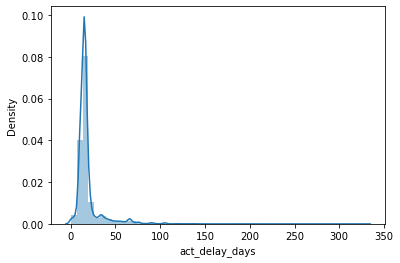

In [53]:
sns.distplot(y_train) # tells us about target

<AxesSubplot:xlabel='business_code', ylabel='act_delay_days'>

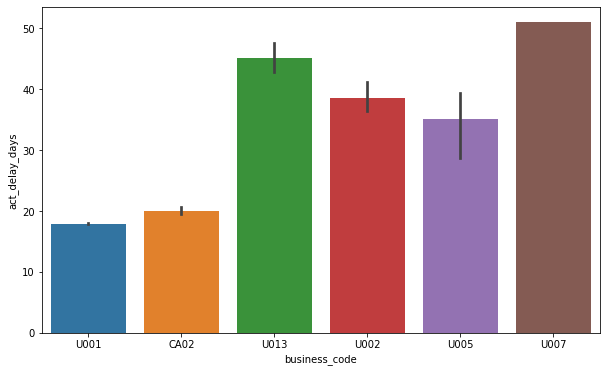

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x="business_code", y=y_train,data=X_train,linewidth=2.5)


##### Inference From the Above Graph
#U013 and U007 delays more ,then comes U005. U001 pays the earliest. By this it is easier to compare which business code 
#delays the payment more . 

<AxesSubplot:xlabel='cust_payment_terms', ylabel='act_delay_days'>

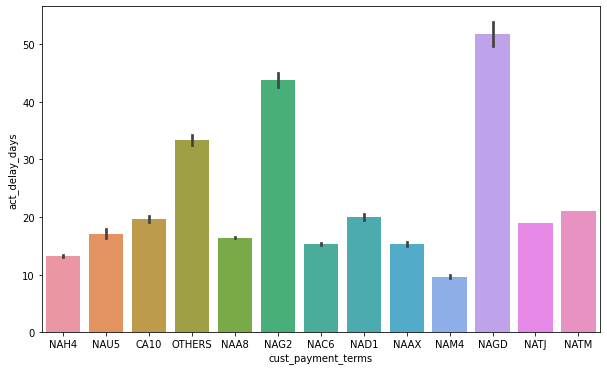

In [56]:
plt.figure(figsize=(10,6))
sns.barplot(x="cust_payment_terms", y=y_train,data=X_train,linewidth=2.5) 


#### Inference:
    #NAGD delays the most, then comes NAG2. The businesses which comes under 'OTHERS' also delay their payment usually. 


#### Label Encoding
In the follwing block of codes, we have clubbed and label encoded some data. This process basically means converting the labels in machine-readable form. This makes the data efficient enough for the training of the model.

In [58]:
X_train['business_code'].value_counts()

U001    27054
CA02     2410
U013      432
U002       90
U005        9
U007        1
Name: business_code, dtype: int64

In [59]:
X_train['business_code'] = np.where(X_train['business_code'].isin(['U001', 'CA02', 'U013', 'U002']), X_train['business_code'], 'U005')
#Clubbing.

In [60]:
#label encoding of business_code
#mapping it to xtest and val
business_code_enc = LabelEncoder()
X_train['business_code_enc'] = business_code_enc.fit_transform(X_train['business_code'])
X_test['business_code_enc'] = business_code_enc.fit_transform(X_test['business_code'])
X_val['business_code_enc'] = business_code_enc.fit_transform(X_val['business_code'])



In [61]:
# #label encoding of age_bucket

# age_bucket_enc = LabelEncoder()
# X_train['age_bucket_enc'] = age_bucket_enc.fit_transform(X_train['age_bucket'])
# X_test['age_bucket_enc'] = age_bucket_enc.fit_transform(X_test['age_bucket'])
# X_val['age_bucket_enc'] = age_bucket_enc.fit_transform(X_val['age_bucket'])



In [62]:
X_train.head() #to keep checking 

,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date_norm,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,clear_date_pd,post_date_pd,due_date_pd,exp_delay_days,business_code_enc
0,U001,0200759878,2019-01-15 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,14380.16,NAH4,1.928533e+09,2019-01-15,2018-12-30,2019-01-14,15,1
1,U001,0200769623,2019-01-15 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,67716.67,NAH4,1.928542e+09,2019-01-15,2018-12-30,2019-01-14,15,1
2,U001,0200772670,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,102714.96,NAU5,1.928543e+09,2019-01-14,2018-12-30,2019-01-14,15,1
3,U001,0200772670,2019-01-14 00:00:00,2019.0,2018-12-30,20181230,20190114.0,USD,163687.89,NAU5,1.928541e+09,2019-01-14,2018-12-30,2019-01-14,15,1
4,CA02,0140105785,2019-01-18 00:00:00,2019.0,2018-12-30,20181230,20190113.0,CAD,46528.10,CA10,2.960520e+09,2019-01-18,2018-12-30,2019-01-13,14,0


#### Feature Engineering. 
In the following few blocks, we have transformed the data in certain more features to study about them better and to come up with more accuracy. 

In [63]:

# X_train['document_create_date_norm'] = pd.to_datetime(X_train.document_create_date_norm,format='%Y%m%d')
# X_train['clear_month'] = X_train['clear_date_pd'].dt.month
# X_train['issue_month'] = X_train['document_create_date_norm'].dt.month
# X_train['weekday_clearance'] = X_train['clear_date_pd'].dt.dayofweek
# X_train['due_month'] = X_train['due_date_pd'].dt.month
# X_train['clear_day'] = X_train['clear_date_pd'].dt.day 


X_train['document_create_date_norm'] = pd.to_datetime(X_train.document_create_date_norm)
X_train['issue_month'] = X_train['document_create_date_norm'].dt.month
X_train['issue_day'] = X_train['document_create_date_norm'].dt.day
X_train['due_month'] = X_train['due_date_pd'].dt.month
X_train['due_dayofweek'] = X_train['due_date_pd'].dt.dayofweek
X_train['due_day'] = X_train['due_date_pd'].dt.day


In [64]:
# X_test['document_create_date_norm'] = pd.to_datetime(X_test.document_create_date_norm,format='%Y%m%d')
# X_test['clear_month'] = X_test['clear_date_pd'].dt.month
# X_test['issue_month'] = X_test['document_create_date_norm'].dt.month
# X_test['weekday_clearance'] = X_test['clear_date_pd'].dt.dayofweek
# X_test['due_month'] = X_test['due_date_pd'].dt.month
# X_test['clear_day'] = X_test['clear_date_pd'].dt.day 

X_test['document_create_date_norm'] = pd.to_datetime(X_test.document_create_date_norm)
X_test['issue_month'] = X_test['document_create_date_norm'].dt.month
X_test['issue_day'] = X_test['document_create_date_norm'].dt.day
X_test['due_month'] = X_test['due_date_pd'].dt.month
X_test['due_dayofweek'] = X_test['due_date_pd'].dt.dayofweek
X_test['due_day'] = X_test['due_date_pd'].dt.day

In [65]:
# X_val['document_create_date_norm'] = pd.to_datetime(X_val.document_create_date_norm,format='%Y%m%d')
# X_val['clear_month'] = X_val['clear_date_pd'].dt.month
# X_val['issue_month'] = X_val['document_create_date_norm'].dt.month
# X_val['weekday_clearance'] = X_val['clear_date_pd'].dt.dayofweek
# X_val['due_month'] = X_val['due_date_pd'].dt.month
# X_val['clear_day'] = X_val['clear_date_pd'].dt.day 

X_val['document_create_date_norm'] = pd.to_datetime(X_val.document_create_date_norm)
X_val['issue_month'] = X_val['document_create_date_norm'].dt.month
X_val['issue_day'] = X_val['document_create_date_norm'].dt.day
X_val['due_month'] = X_val['due_date_pd'].dt.month
X_val['due_dayofweek'] = X_val['due_date_pd'].dt.dayofweek
X_val['due_day'] = X_val['due_date_pd'].dt.day

<AxesSubplot:xlabel='due_month', ylabel='act_delay_days'>

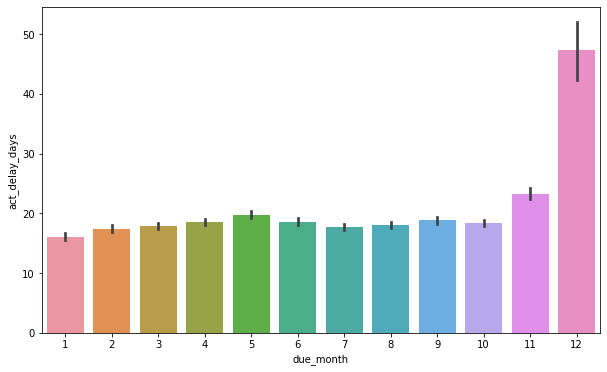

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x="due_month", y=y_train,data=X_train,linewidth=2.5) 

#### After getting more features, it got clear that most payments get delayed during December.

In [68]:
#binarizing the CAD in 0 and USD in 1 
X_train['invoice_currency'] = X_train['invoice_currency'].map({'CAD': 0,'USD': 1})
X_test['invoice_currency'] = X_test['invoice_currency'].map({'CAD': 0,'USD': 1})
X_val['invoice_currency'] = X_val['invoice_currency'].map({'CAD': 0,'USD': 1})


<AxesSubplot:>

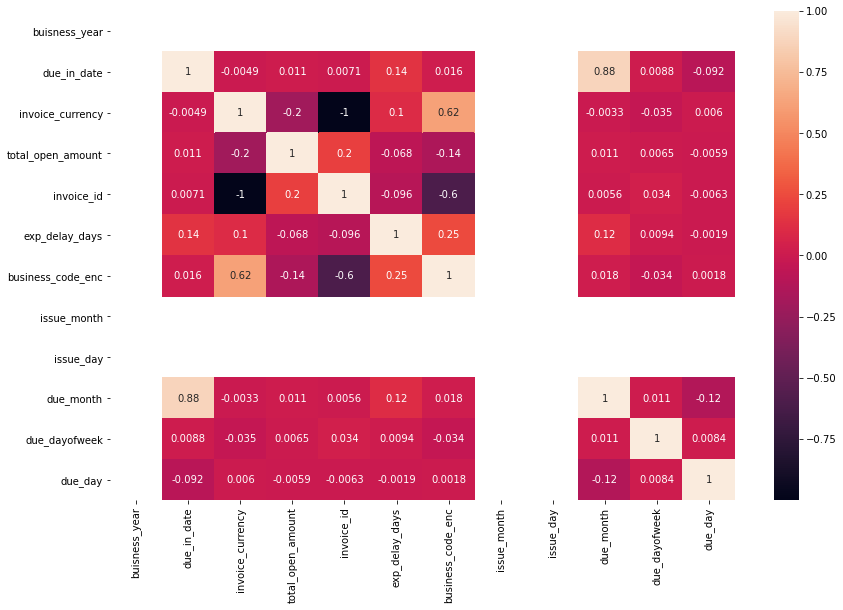

In [69]:
train=X_train.copy()
corr=train.corr()
plt.figure(figsize=(14,9))
sns.heatmap(corr,annot=True)

#The one with whites are to be removed (near the 1.00) to infer results with more accuracy 

In [70]:
#invoice currency and business year has max corr
X_train.head()


,business_code,cust_number,clear_date,buisness_year,posting_date,document_create_date_norm,due_in_date,invoice_currency,total_open_amount,cust_payment_terms,invoice_id,clear_date_pd,post_date_pd,due_date_pd,exp_delay_days,business_code_enc,issue_month,issue_day,due_month,due_dayofweek,due_day
0,U001,0200759878,2019-01-15 00:00:00,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,20190114.0,1,14380.16,NAH4,1.928533e+09,2019-01-15,2018-12-30,2019-01-14,15,1,1,1,1,0,14
1,U001,0200769623,2019-01-15 00:00:00,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,20190114.0,1,67716.67,NAH4,1.928542e+09,2019-01-15,2018-12-30,2019-01-14,15,1,1,1,1,0,14
2,U001,0200772670,2019-01-14 00:00:00,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,20190114.0,1,102714.96,NAU5,1.928543e+09,2019-01-14,2018-12-30,2019-01-14,15,1,1,1,1,0,14
3,U001,0200772670,2019-01-14 00:00:00,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,20190114.0,1,163687.89,NAU5,1.928541e+09,2019-01-14,2018-12-30,2019-01-14,15,1,1,1,1,0,14
4,CA02,0140105785,2019-01-18 00:00:00,2019.0,2018-12-30,1970-01-01 00:00:00.020181230,20190113.0,0,46528.10,CA10,2.960520e+09,2019-01-18,2018-12-30,2019-01-13,14,0,1,1,1,6,13


#### Final Train, Test and Val sets
We have kept the features only in Train, Test and Val. 

In [71]:
X_train.drop(["business_code",'cust_number', 'clear_date', 'buisness_year', 'posting_date',
                 'document_create_date_norm', 'due_in_date', 'post_date_pd', 'cust_payment_terms', 
                 'invoice_id', 'due_date_pd', 'total_open_amount', 'clear_date_pd'],
                 axis=1,inplace=True) 

In [72]:
 X_test.drop(["business_code",'cust_number', 'clear_date', 'buisness_year', 'posting_date',
                 'document_create_date_norm', 'due_in_date', 'post_date_pd', 'cust_payment_terms', 
                 'invoice_id', 'due_date_pd', 'total_open_amount', 'clear_date_pd'],
                 axis=1,inplace=True)

In [73]:
X_val.drop(["business_code",'cust_number', 'clear_date', 'buisness_year', 'posting_date',
                 'document_create_date_norm', 'due_in_date', 'post_date_pd', 'cust_payment_terms', 
                 'invoice_id', 'due_date_pd', 'total_open_amount', 'clear_date_pd'],
                 axis=1,inplace=True) 

In [74]:
# X_train.drop(['delay'],axis=1,inplace=True)
# X_test.drop(['delay'],axis=1,inplace=True)
# X_val.drop(['delay'],axis=1,inplace=True)

In [75]:
X_train.head() #checking 


,invoice_currency,exp_delay_days,business_code_enc,issue_month,issue_day,due_month,due_dayofweek,due_day
0,1,15,1,1,1,1,0,14
1,1,15,1,1,1,1,0,14
2,1,15,1,1,1,1,0,14
3,1,15,1,1,1,1,0,14
4,0,14,0,1,1,1,6,13


## Model Fitting and Testing (MILESTONE 3)
Here we basically fit the model and make it go through various testing methods. By doing this we get to compare and choose the best. 


In [76]:
MSE_Score = []
R2_Score = []
Algorithm = [] # Making tables to compare scores 

In [77]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)



LinearRegression()

In [78]:
# Appending the Scores For Visualisation at a Later Part
# Predicting the Test Set Results
predicted = clf.predict(X_test)
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [79]:
predicted = clf.predict(X_val)
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [80]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)



SVR()

In [81]:
# Predicting the Test Set Results
predicted = clf.predict(X_test)
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))


In [82]:
# Predicting the Val Set Results
predicted = clf.predict(X_val)
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))


In [83]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [84]:

# Predicting the Test Set Results
predicted = clf.predict(X_test)
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))


In [85]:
# Predicting the valSet Results
predicted = clf.predict(X_val)
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [86]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf_random_forest = RandomForestRegressor()
clf_random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [87]:
# Predicting the Test Set Results
predicted = clf_random_forest.predict(X_test)
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [88]:
predicted = clf_random_forest.predict(X_val)
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [89]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf_xgb = xgb.XGBRegressor(max_depth=5, n_estimators=75) #HYPERPARAMETER TUNING
clf_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=75, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [90]:
# Predicting the Test Set Results
predicted = clf_xgb.predict(X_test)
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

In [91]:
predicted = clf_xgb.predict(X_val)
MSE_Score.append(mean_squared_error(y_val, predicted))
R2_Score.append(r2_score(y_val, predicted))

In [92]:
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])

In [93]:
Comparison

,Algorithm,MSE_Score,R2_Score
0,Linear Regression,108.910205,0.347378
1,Support Vector Regression,30.203164,0.096304
2,Decision Tree Regressor,104.166022,0.375806
3,Random Forest Regressor,28.912237,0.134930
4,XGB Regressor,128.200644,0.231784


## Inferenece from Hyper Parameter Tuning 

After using hyperparameter tuning in XGB Regressor, I am able to infer that it reduces the error message significantly. 
The result of index 4, (XGB Regressor) is the one which we got without any hyperparameter tuning. 
The one below it gives us the result after performing the hyperparameter tuning. 
Basically , we can infer that, hyperparameter tuning reduces the error and gets us closer to the accurate value.
I am going with the random forest regressor since its rmse is 5.29 

In [94]:
#

In [95]:
df= pd.read_csv('testdata.csv')
df.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR in,NaN,2020.0,1.930883e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,1986.95,20200509.0,NAH4,1.930883e+09,1
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930715e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,45150.75,20200328.0,NAH4,1.930715e+09,1
2,CA02,0140104440,SO in,NaN,2020.0,2.960628e+09,2020-04-08,20200408,20200408,20200419.0,CAD,RV,1.0,NaN,74302.41,20200409.0,CA10,2.960628e+09,1
3,U001,0200148860,DOLLA llc,NaN,2020.0,1.930847e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,38805.89,20200502.0,NAA8,1.930847e+09,1
4,U001,0200726979,BJ'S systems,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200502.0,USD,RV,1.0,NaN,24651.51,20200227.0,NAGD,1.930568e+09,1


In [96]:
df['post_date_pd'] = pd.to_datetime(df['posting_date'])
df['due_date_pd'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d')
df['exp_delay_days'] = df['due_date_pd'] - df['post_date_pd']
df['exp_delay_days'] = df.exp_delay_days.astype('timedelta64[D]').astype(int)

# Changed the format in this cell 

In [97]:
df.head()
#checking 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,post_date_pd,due_date_pd,exp_delay_days
0,U001,200769623,WAL-MAR in,NaN,2020.0,1.930883e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,1986.95,20200509.0,NAH4,1.930883e+09,1,2020-05-09,2020-05-24,15
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930715e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,45150.75,20200328.0,NAH4,1.930715e+09,1,2020-03-28,2020-04-12,15
2,CA02,0140104440,SO in,NaN,2020.0,2.960628e+09,2020-04-08,20200408,20200408,20200419.0,CAD,RV,1.0,NaN,74302.41,20200409.0,CA10,2.960628e+09,1,2020-04-08,2020-04-19,11
3,U001,0200148860,DOLLA llc,NaN,2020.0,1.930847e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,38805.89,20200502.0,NAA8,1.930847e+09,1,2020-05-02,2020-05-17,15
4,U001,0200726979,BJ'S systems,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200502.0,USD,RV,1.0,NaN,24651.51,20200227.0,NAGD,1.930568e+09,1,2020-02-27,2020-05-02,65


In [98]:
df['cust_payment_terms'].value_counts()

NAA8    4094
NAH4    3078
CA10     677
NAC6     417
NAM4     260
NAGD     255
NAAX     242
NAU5     201
NAD1     120
NAM2     116
NAG2      88
NA32      71
NA10      64
NAX2      56
NAVE      46
NAM1      45
NAAW      35
NAD5      32
NAWP      21
NAVF      17
NAVQ       8
NA38       7
NACH       6
NA84       6
NAM3       4
NACG       4
NACB       4
NA3F       3
NABG       3
NAUZ       3
BR12       2
NAB1       2
NAD4       2
NAUW       2
BR56       1
CAX2       1
NAVD       1
CA30       1
C106       1
NAUY       1
NAV9       1
CAB1       1
NA3B       1
Name: cust_payment_terms, dtype: int64

In [99]:
df['cust_payment_terms']=np.where(df['cust_payment_terms']
                                .isin(["B112","NAUY","NACG","NACH", "B052", "NACE", "NAV9", "NAWM", "NANC", "NATU", "NA31"
                                , "NATK", "C129", "NA24", "NAUW", "BR12", "NAV2", "NATL", "CA60", "NA25"
                                , "NAUN", "NATV", "NATX", "CAX2", "NATH", "NAUI", "90M7", "NAM3", "NAD8","NATZ", "NAUP", "NAVC", "CAB1", "NAVD", "BR56", "NAVL", "NA8Q", "NA3F"
                                , "NAD4", "NA9X", "C106", "NA84", "NAB1", "NATW", "NA38", "NACB", "NABG"
                                , "CA30", "NA3B", "NAUZ", "NAVM", "NAWN", "NAVQ", "NAWP", "NAVR", "NAWU"
                                , "NAAW", "NAVF", "NAD5", "NA10", "NAM2", "NAX2", "NA32", "NAM1", "NAVE"])
                                ,"OTHERS", 
                                df['cust_payment_terms'])
# Clubbing the ones with low frequency to OTHERS

In [100]:
df = df.rename(columns= {'document type': 'document_type'} )
df = df.rename(columns= {'document_create_date.1': 'document_create_date_norm'} ) #renaming

In [101]:
df['business_code'].value_counts() #value counting

U001    9218
CA02     682
U013      70
U002      27
U005       2
U007       1
Name: business_code, dtype: int64

In [102]:
df['business_code'] = np.where(df['business_code'].isin(['U001', 'CA02', 'U013', 'U002']), df['business_code'], 'U005')
#clubbing

In [103]:
df['business_code_enc'] = business_code_enc.fit_transform(df['business_code'])
#clubbing

In [104]:
#Feature engineering. Basically splitting the date and getting more features of it.
df['document_create_date_norm'] = pd.to_datetime(df.document_create_date_norm, format='%Y%m%d')
df['issue_month'] = df['document_create_date_norm'].dt.month
df['issue_day'] = df['document_create_date_norm'].dt.day
df['due_month'] = df['due_date_pd'].dt.month
df['due_dayofweek'] = df['due_date_pd'].dt.dayofweek
df['due_day'] = df['due_date_pd'].dt.day


In [105]:
df['invoice_currency'] = df['invoice_currency'].map({'CAD': 0,'USD': 1}) #mapping

In [106]:
df.head() #checking

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date_norm,due_in_date,invoice_currency,document_type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,post_date_pd,due_date_pd,exp_delay_days,business_code_enc,issue_month,issue_day,due_month,due_dayofweek,due_day
0,U001,200769623,WAL-MAR in,NaN,2020.0,1.930883e+09,2020-05-09,20200509,2020-05-09,20200524.0,1,RV,1.0,NaN,1986.95,20200509.0,NAH4,1.930883e+09,1,2020-05-09,2020-05-24,15,1,5,9,5,6,24
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930715e+09,2020-03-28,20200328,2020-03-28,20200412.0,1,RV,1.0,NaN,45150.75,20200328.0,NAH4,1.930715e+09,1,2020-03-28,2020-04-12,15,1,3,28,4,6,12
2,CA02,0140104440,SO in,NaN,2020.0,2.960628e+09,2020-04-08,20200408,2020-04-08,20200419.0,0,RV,1.0,NaN,74302.41,20200409.0,CA10,2.960628e+09,1,2020-04-08,2020-04-19,11,0,4,8,4,6,19
3,U001,0200148860,DOLLA llc,NaN,2020.0,1.930847e+09,2020-05-02,20200501,2020-05-02,20200517.0,1,RV,1.0,NaN,38805.89,20200502.0,NAA8,1.930847e+09,1,2020-05-02,2020-05-17,15,1,5,2,5,6,17
4,U001,0200726979,BJ'S systems,NaN,2020.0,1.930568e+09,2020-02-27,20200225,2020-02-27,20200502.0,1,RV,1.0,NaN,24651.51,20200227.0,NAGD,1.930568e+09,1,2020-02-27,2020-05-02,65,1,2,27,5,5,2


In [107]:
#dropping the unnecessary ones
df.drop(["business_code",'cust_number','name_customer', 'clear_date', 'buisness_year', 'doc_id','posting_date',
              'document_create_date' ,  'document_create_date_norm', 'due_in_date', 'post_date_pd', 'cust_payment_terms', 
                 'invoice_id', 'due_date_pd', 'total_open_amount','document_type','area_business',
        'posting_id','baseline_create_date','isOpen'],
                 axis=1,inplace=True) 

In [108]:
 #getting the result from test data
result=clf_random_forest.predict(df)

In [109]:
#final table main test data 
final_output=pd.DataFrame(result) 
final_output.head()

,0
0,14.479787
1,13.695085
2,16.931393
3,15.021125
4,53.687771


In [110]:
df= pd.read_csv('testdata.csv')
df.head() 

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR in,NaN,2020.0,1.930883e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,1986.95,20200509.0,NAH4,1.930883e+09,1
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930715e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,45150.75,20200328.0,NAH4,1.930715e+09,1
2,CA02,0140104440,SO in,NaN,2020.0,2.960628e+09,2020-04-08,20200408,20200408,20200419.0,CAD,RV,1.0,NaN,74302.41,20200409.0,CA10,2.960628e+09,1
3,U001,0200148860,DOLLA llc,NaN,2020.0,1.930847e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,38805.89,20200502.0,NAA8,1.930847e+09,1
4,U001,0200726979,BJ'S systems,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200502.0,USD,RV,1.0,NaN,24651.51,20200227.0,NAGD,1.930568e+09,1


In [111]:
final_output.dtypes

0    float64
dtype: object

In [112]:
#converting the final_output. 
final_output['day_numbers']= final_output.astype(int)
final_output['day_numbers']= np.round(final_output['day_numbers'])

df['post_date_pd'] = pd.to_datetime(df['posting_date'])
#final_output['predicted_date']= final_output.astype(int)
df['predicted_days']= final_output.day_numbers.astype('timedelta64[D]')    



In [113]:
df['predicted_date']=df['post_date_pd'] + df['predicted_days'] 

In [114]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,post_date_pd,predicted_days,predicted_date
0,U001,200769623,WAL-MAR in,NaN,2020.0,1.930883e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,1986.95,20200509.0,NAH4,1.930883e+09,1,2020-05-09,14 days,2020-05-23
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930715e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,45150.75,20200328.0,NAH4,1.930715e+09,1,2020-03-28,13 days,2020-04-10
2,CA02,0140104440,SO in,NaN,2020.0,2.960628e+09,2020-04-08,20200408,20200408,20200419.0,CAD,RV,1.0,NaN,74302.41,20200409.0,CA10,2.960628e+09,1,2020-04-08,16 days,2020-04-24
3,U001,0200148860,DOLLA llc,NaN,2020.0,1.930847e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,38805.89,20200502.0,NAA8,1.930847e+09,1,2020-05-02,15 days,2020-05-17
4,U001,0200726979,BJ'S systems,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200502.0,USD,RV,1.0,NaN,24651.51,20200227.0,NAGD,1.930568e+09,1,2020-02-27,53 days,2020-04-20


##### The following block of codes gets the delay of due date & predicted date. 

In [116]:
#1) convt to datetime
df['due_date_pd'] = pd.to_datetime(df['due_in_date'], format='%Y%m%d') 

In [117]:
#2) getting delay in days 
df['delay'] = df['predicted_date'] - df['due_date_pd'] 

In [118]:
#3) converting to timedelta and then int 
df['delay'] = df.delay.astype('timedelta64[D]').astype(int) 

In [119]:
#neg values to 0
df['delay'] = np.where(df.delay.lt(0), 0, df.delay) 

In [120]:
#binarization
bins = [0,15,30,45,60, 1000]   #6 elements
category = ["0-15 days", "16-30 days", "31-45 days", "46-60 days", "Greater than 60 days"]  #5 elements
df['age_bucket'] = pd.cut(df["delay"],bins,labels = category)

In [121]:
# Filling the NaN values to 0-15 days
df["age_bucket"].fillna('0-15 days', inplace = True) 

In [122]:
 # converting the age bucket into string(in general format). 
df['age_bucket'] = df.age_bucket.astype(str)

In [123]:
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,post_date_pd,predicted_days,predicted_date,due_date_pd,delay,age_bucket
0,U001,200769623,WAL-MAR in,NaN,2020.0,1.930883e+09,2020-05-09,20200509,20200509,20200524.0,USD,RV,1.0,NaN,1986.95,20200509.0,NAH4,1.930883e+09,1,2020-05-09,14 days,2020-05-23,2020-05-24,0,0-15 days
1,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930715e+09,2020-03-28,20200328,20200328,20200412.0,USD,RV,1.0,NaN,45150.75,20200328.0,NAH4,1.930715e+09,1,2020-03-28,13 days,2020-04-10,2020-04-12,0,0-15 days
2,CA02,0140104440,SO in,NaN,2020.0,2.960628e+09,2020-04-08,20200408,20200408,20200419.0,CAD,RV,1.0,NaN,74302.41,20200409.0,CA10,2.960628e+09,1,2020-04-08,16 days,2020-04-24,2020-04-19,5,0-15 days
3,U001,0200148860,DOLLA llc,NaN,2020.0,1.930847e+09,2020-05-02,20200501,20200502,20200517.0,USD,RV,1.0,NaN,38805.89,20200502.0,NAA8,1.930847e+09,1,2020-05-02,15 days,2020-05-17,2020-05-17,0,0-15 days
4,U001,0200726979,BJ'S systems,NaN,2020.0,1.930568e+09,2020-02-27,20200225,20200227,20200502.0,USD,RV,1.0,NaN,24651.51,20200227.0,NAGD,1.930568e+09,1,2020-02-27,53 days,2020-04-20,2020-05-02,0,0-15 days


In [124]:
df.to_csv("output.csv")